In [2]:
# tools for chatbot
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper


In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=400)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="search for papers on arxiv")
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention laye"

In [5]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=400)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki,description="search for wikipedia articles")
wiki.name

'wikipedia'

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [7]:
from langchain_community.tools import TavilySearchResults
tavily=TavilySearchResults(max_results=2,doc_content_chars_max=400)


/var/folders/0x/rj5l5p_d5q5fl64y_t8rc53r0000gn/T/ipykernel_69689/526552018.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults(max_results=2,doc_content_chars_max=400)


In [8]:
tavily.invoke("whats the news today")

[{'title': 'Eyewitness News at 6am - July 9, 2025 - ABC7 New York',
  'url': 'https://abc7ny.com/videoClip/17033159/',
  'content': "### Woman killed in pizza shop fire after e-bike bursts into flames\n\n### 1 killed, 2 others hurt in shooting and slashing in the Bronx: sources\n\n### Supreme Court clears the way for Trump to slash federal workforce\n\nABC7 New York [...] # Eyewitness News at 6am - July 9, 2025\n\nWABC logo\nEyewitness News at 6am - July 9, 2025\n\n## Related Topics\n\n## Top Stories\n\n## Mamdani endorsed by teachers' union; Trump threatens takeover\n\n## Searchers in helicopters scour Texas flood debris for the missing\n\n## Crews cleaning up after thunderstorms bring down trees in NJ\n\n## Philadelphia workers and city reach a deal to end trash strike\n\n## Car fire in Lincoln Tunnel leads to 6 injuries, massive delays",
  'score': 0.2624664},
 {'title': 'Portal:Current events/July 2025 - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Portal:Current_events/July

In [9]:
# combining all tolls into list
tools=[arxiv,wiki,tavily]




In [10]:
from langchain_groq import ChatGroq 
llm=ChatGroq(model="qwen-qwq-32b")

In [11]:
llm.invoke("what is AI")

AIMessage(content='\n<think>\nOkay, the user is asking "what is AI". Let me start by breaking down the term. AI stands for Artificial Intelligence, right? So I should explain that first. But I need to make sure I cover the basics without getting too technical. Maybe start with a simple definition: the ability of machines to perform tasks that typically require human intelligence.\n\nHmm, what are the key areas of AI? There\'s machine learning, which is a subset. I should mention that. Also, neural networks and deep learning might be important to touch on. But I don\'t want to overload them with too much jargon. Maybe give examples of AI applications they might be familiar with, like voice assistants (Siri, Alexa), recommendation systems (Netflix, Spotify), or self-driving cars.\n\nWait, the user might also be interested in the goals of AI. Like, AI can be categorized into narrow or general. Narrow AI does specific tasks, while general AI would have human-like cognitive abilities. But g

In [12]:
llm_with_tools=llm.bind_tools(tools=tools)


In [13]:
## execute this call in the cell below
llm_with_tools.invoke("what is the latest news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tt9dy8vhz', 'function': {'arguments': '{"query":"latest news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 170, 'prompt_tokens': 270, 'total_tokens': 440, 'completion_time': 0.412287119, 'prompt_time': 0.025583926, 'queue_time': 0.26234547, 'total_time': 0.437871045}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2e58fdec-353e-486b-8acf-2c23843b92e0-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'latest news on AI'}, 'id': 'tt9dy8vhz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 270, 'output_tokens': 170, 'total_tokens': 440})

    TILL NOW THE LLM UNDERSTAND TO WHOM AND WHICH TOOL IT SHOULD SEND THE QUERY BUT CANT ANSWER AND SOME TIMES IT ALSO CAN GIVE THE ANSWER

In [14]:
# START THE ENTIRE WORKFLOW 
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage # Human message or AI message
from typing import Annotated #labelling the messages
from langgraph.graph.message import add_messages  # add messages to the graph

In [15]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages] #messages node available in every node of that langgraph
    # list of all sys message human msg all gets appended
    #  to this list This is one by add_messages. 
    # It doesnt over ride the anaswers but append to the variable 
    # messages and returns in form of typedict


In [16]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
# TOol condition is for when should we use the tool
# if we have a tool node we can use the tool condition


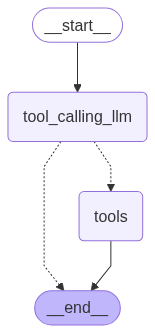

In [17]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}
# Build graph
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools=tools))


builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
    # if tool is called then go to tools node
    # if tool is not called then go to tool_calling_llm node and route to END
)
builder.add_edge("tools",END)
graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))


In [18]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (7wzbsrjv4)
 Call ID: 7wzbsrjv4
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder


In [19]:
messages=graph.invoke({"messages":"Hi my name is irfan"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi my name is irfan
================================== Ai Message ==================================

Hello Irfan! Nice to meet you. How can I assist you today?


The below is a ReAct Architecture

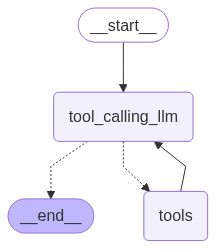

In [20]:
def tool_calling_llm2(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}
# Build graph
builder2=StateGraph(State)
builder2.add_node("tool_calling_llm",tool_calling_llm)
builder2.add_node("tools",ToolNode(tools=tools))


builder2.add_edge(START, "tool_calling_llm")
builder2.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
    # if tool is called then go to tools node
    # if tool is not called then go to tool_calling_llm node and route to END
)
builder2.add_edge("tools","tool_calling_llm")
graph2=builder2.compile()
display(Image(graph2.get_graph().draw_mermaid_png()))


In [21]:
messages=graph2.invoke({"messages":"Hi my name is irfan. please tell me the recent research paper on AI"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi my name is irfan. please tell me the recent research paper on AI
================================== Ai Message ==================================
Tool Calls:
  arxiv (zbqcxz1n7)
 Call ID: zbqcxz1n7
  Args:
    query: recent research papers on AI
================================= Tool Message =================================
Name: arxiv

Published: 2021-11-01
Title: Stakeholder Participation in AI: Beyond "Add Diverse Stakeholders and Stir"
Authors: Fernando Delgado, Stephen Yang, Michael Madaio, Qian Yang
Summary: There is a growing consensus in HCI and AI research that the design of AI
systems needs to engage and empower stakeholders who will be affected by AI.
However, the manner in which stakeholders should participate in AI d
================================== Ai Message ==================================

Here's a recent research paper from arXiv related to AI:

**Title:** Stakeholder Participati

In [22]:
messages=graph.invoke({"messages":"WHat is the recent news on AI and please tell me the recent research paper on AI"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

WHat is the recent news on AI and please tell me the recent research paper on AI
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (r08h7am75)
 Call ID: r08h7am75
  Args:
    query: latest news and developments in artificial intelligence technology
  arxiv (set6keeca)
 Call ID: set6keeca
  Args:
    query: recent advancements in artificial intelligence research papers
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "AI News | Latest AI News, Analysis & Events", "url": "https://www.artificialintelligence-news.com/", "content": "AI News reports on the latest artificial intelligence news and insights. Explore industry trends from the frontline of AI.", "score": 0.7251239}, {"title": "AI News & Artificial Intelligence | TechCrunch", "url": "https://techcrunch.co

In [23]:
messages=graph.invoke({"messages":"Hello my name is irfan"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello my name is irfan
================================== Ai Message ==================================

Hello Irfan! Nice to meet you. How can I assist you today?


In [24]:
messages=graph.invoke({"messages":"What is my name?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

I don't have access to personal information or previous conversation history, so I don't know your name. Could you please tell me your name?


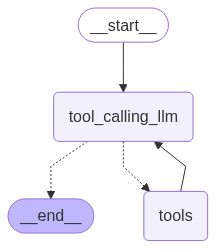

In [29]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()


def tool_calling_llm2(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}
# Build graph
builder2=StateGraph(State)
builder2.add_node("tool_calling_llm",tool_calling_llm)
builder2.add_node("tools",ToolNode(tools=tools))


builder2.add_edge(START, "tool_calling_llm")
builder2.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
    # if tool is called then go to tools node
    # if tool is not called then go to tool_calling_llm node and route to END
)
builder2.add_edge("tools","tool_calling_llm")
graph2=builder2.compile(checkpointer=memory)
display(Image(graph2.get_graph().draw_mermaid_png()))

In [30]:
config={"configurable":{"thread_id":"1"}}
response=graph2.invoke({"messages":"Hi my name is irfan."},config=config)
response

{'messages': [HumanMessage(content='Hi my name is irfan.', additional_kwargs={}, response_metadata={}, id='a85a7d17-5624-48cd-a575-85e9db67521f'),
  AIMessage(content='Hello Irfan! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 180, 'prompt_tokens': 269, 'total_tokens': 449, 'completion_time': 0.436641087, 'prompt_time': 0.015496715, 'queue_time': 0.26000449400000003, 'total_time': 0.452137802}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'stop', 'logprobs': None}, id='run--af5946c8-0553-4ebf-b432-1d78da9232ad-0', usage_metadata={'input_tokens': 269, 'output_tokens': 180, 'total_tokens': 449})]}

In [31]:
response['messages'][-1].pretty_print()

================================== Ai Message ==================================

Hello Irfan! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊


In [32]:
response2=graph2.invoke({"messages":"Hi do you remember my name ?"},config=config)
response2['messages'][-1].pretty_print()

================================== Ai Message ==================================

Hello again, Irfan! Yes, I remember your name. How can I assist you today? 😊


# STREAMING

In [33]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}


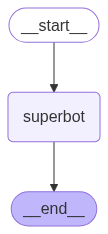

In [34]:
graph=StateGraph(State)
graph.add_node("superbot",superbot)
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)
graph=graph.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config={"configurable":{"thread_id":"2"}}
response=graph.invoke({"messages":"Hi my name is irfan."},config=config)
response['messages'][-1].pretty_print()

================================== Ai Message ==================================


<think>
Okay, the user said "Hi my name is irfan." again. Let me check the history. Oh right, in the first message they introduced themselves, and I responded. Now they're repeating the same message. Maybe they're testing if I remember their name? Or perhaps they're not sure how to proceed.

I should acknowledge their greeting again but this time use their name to show I remember. Maybe prompt them to ask for what they need help with. Keep it friendly and encouraging. Let's see... "Hello again, Irfan!" That's good. Then ask how I can assist them today, maybe add an emoji to keep it warm. Yeah, that should work. Make sure not to assume they forgot, just a gentle nudge to proceed with their request.
</think>

Hello again, Irfan! 😊 How can I assist you today? Feel free to ask anything!


In [38]:
config={"configurable":{"thread_id":"3"}}
for chunk in graph.stream({"messages":"Hi my name is irfan. and i like cricket"},config=config,stream_mode="updates"):
    print(chunk)

{'superbot': {'messages': [AIMessage(content='\n<think>\nOkay, the user introduced themselves as Irfan and mentioned liking cricket. I should respond in a friendly way.\n\nFirst, I\'ll greet them back. Maybe say "Hi Irfan!" to acknowledge their name.\n\nNext, I should show interest in their interest by asking about their favorite cricket team or players. That could lead to a conversation.\n\nAlso, maybe ask if they follow any particular tournaments. The World Cup is a big one, so mentioning that makes sense.\n\nI need to keep it open-ended so they can choose what to talk about. Maybe end with a question to encourage them to share more.\n\nLet me put that together in a natural, conversational tone without any jargon or complicated words. Keep it simple and friendly.\n</think>\n\nHi Irfan! That\'s a great hobby—cricket is such a thrilling sport! Do you have a favorite cricket team or player? And do you enjoy following tournaments like the World Cup or the IPL? 😊 Let me know—I’d love to c

In [39]:
for chunk in graph.stream({"messages":"Hi my name is irfan. and i like cricket"},config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi my name is irfan. and i like cricket', additional_kwargs={}, response_metadata={}, id='e4ed58c4-fc9a-4255-a2af-85d25bbb9f5f'), AIMessage(content='\n<think>\nOkay, the user introduced themselves as Irfan and mentioned liking cricket. I should respond in a friendly way.\n\nFirst, I\'ll greet them back. Maybe say "Hi Irfan!" to acknowledge their name.\n\nNext, I should show interest in their interest by asking about their favorite cricket team or players. That could lead to a conversation.\n\nAlso, maybe ask if they follow any particular tournaments. The World Cup is a big one, so mentioning that makes sense.\n\nI need to keep it open-ended so they can choose what to talk about. Maybe end with a question to encourage them to share more.\n\nLet me put that together in a natural, conversational tone without any jargon or complicated words. Keep it simple and friendly.\n</think>\n\nHi Irfan! That\'s a great hobby—cricket is such a thrilling sport! Do yo

In [40]:
config={"configurable":{"thread_id":"4"}}
for chunk in graph.stream({"messages":"Hi my name is irfan. and i like cricket"},config=config,stream_mode="updates"):
    print(chunk)

{'superbot': {'messages': [AIMessage(content="\n<think>\nOkay, the user introduced himself as Irfan and mentioned he likes cricket. I should respond in a friendly way. Let me start by greeting him and acknowledging his interest in cricket. Maybe ask him some questions to keep the conversation going. I can ask if he's a fan of any particular cricket team or player. Also, since it's a conversation, I should make it open-ended so he feels comfortable to share more. Let me check the response structure to make sure it's welcoming and engaging. Maybe use some emojis to keep the tone friendly. Alright, that should work.\n</think>\n\nHi Irfan! Nice to meet you 👋 It's great that you like cricket! 🏏 Are you a fan of any particular cricket team or player? And do you enjoy playing cricket yourself? I'd love to hear more about your interests!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 172, 'prompt_tokens': 21, 'total_tokens': 193, 'completion_time': 0.440157639,

In [41]:
for chunk in graph.stream({"messages":"I also like football"},config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi my name is irfan. and i like cricket', additional_kwargs={}, response_metadata={}, id='ccbcba78-3f23-4d09-ade4-0aa9854c0da5'), AIMessage(content="\n<think>\nOkay, the user introduced himself as Irfan and mentioned he likes cricket. I should respond in a friendly way. Let me start by greeting him and acknowledging his interest in cricket. Maybe ask him some questions to keep the conversation going. I can ask if he's a fan of any particular cricket team or player. Also, since it's a conversation, I should make it open-ended so he feels comfortable to share more. Let me check the response structure to make sure it's welcoming and engaging. Maybe use some emojis to keep the tone friendly. Alright, that should work.\n</think>\n\nHi Irfan! Nice to meet you 👋 It's great that you like cricket! 🏏 Are you a fan of any particular cricket team or player? And do you enjoy playing cricket yourself? I'd love to hear more about your interests!", additional_kwargs

# HUMAN IN THE LOOP

In [70]:
import os
from langchain.chat_models import init_chat_model
llm=init_chat_model(model="groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x1260d7c10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x17f3ee510>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

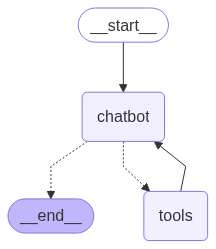

In [71]:
from typing import Annotated
from langchain_tavily import TavilySearch
from langchain_core.tools import tool
from typing_extensions import TypedDict
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.graph.message import add_messages
from langgraph.types import Command,interrupt
class state(TypedDict):
    messages:Annotated[list,add_messages]
graph_builder=StateGraph(state)
@tool
def human_assistance(query:str)-> str:
    """
    This function provides human assistance by interrupting the process
    and returning a human response based on the given query.
    """
    human_response=interrupt({"query":query})
    return human_response["data"]
tool=TavilySearch(max_results=2)
tools=[tool,human_assistance]
llm_with_tools=llm.bind_tools(tools)
def chatbot(state:State):
    message=llm_with_tools.invoke(state["messages"])
    # Because we will be interrupting during tool execution,
    # we disable parallel tool calling to avoid repeating any
    # tool invocations when we resume.
    return {"messages":[message]}
toolnode=ToolNode(tools=tools)
graph_builder.add_node("tools",toolnode)
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
memory = MemorySaver()

graph = graph_builder.compile(checkpointer=memory)
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass




In [72]:

user_input = "I need some expert guidance and assistance from a top knowldege person for building a ML model. Could you request assistance for me?"
config = {"configurable": {"thread_id": "6"}}
events = graph.stream(
    {"messages": user_input},
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I need some expert guidance and assistance from a top knowldege person for building a ML model. Could you request assistance for me?
================================== Ai Message ==================================
Tool Calls:
  human_assistance (8tknkfbak)
 Call ID: 8tknkfbak
  Args:
    query: Request for expert guidance and assistance from a top knowledge person for building a ML model.


In [73]:
human_response = (
    "We, the experts are here to help! We'd recommend you check out docker to build your ML agent."
    " It's much more reliable and extensible for ML agent."
)
human_command=Command(resume={"data":human_response})
events=graph.stream(human_command,config,stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  human_assistance (8tknkfbak)
 Call ID: 8tknkfbak
  Args:
    query: Request for expert guidance and assistance from a top knowledge person for building a ML model.
================================= Tool Message =================================
Name: human_assistance

We, the experts are here to help! We'd recommend you check out docker to build your ML agent. It's much more reliable and extensible for ML agent.
================================== Ai Message ==================================
Tool Calls:
  tavily_search (fe387bryz)
 Call ID: fe387bryz
  Args:
    query: What is Docker and how can it be used for building a ML model?
================================= Tool Message =================================
Name: tavily_search

{"query": "What is Docker and how can it be used for building a ML model?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://

In [48]:
!pip install langchain_tavily


  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.9/469.9 kB 7.1 MB/s eta 0:00:00a 0:00:01
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: yarl
    Found existing installation: yarl 1.9.3
    Uninstalling yarl-1.9.3:
      Successfully uninstalled yarl-1.9.3
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.9.3
    Uninstalling aiohttp-3.9.3:
      Successfully uninstalled aiohttp-3.9.3
